In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [2]:
bike=pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Exploring Data

In [4]:
# explore data
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


comment- 
1. This data does not have any null values.
2. For better readability we will convert season , weathersit and weekday have numerical value 1,2,3.

In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#null values
bike. isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
#The data shows that the instant column is an index column, so we will eliminate it.
bike.drop(['instant'], axis=1,inplace=True)

In [10]:
# Dropping dteday as it is not much needed as per our analysis.
bike.drop(['dteday'], axis=1,inplace=True)

In [11]:
#Removing casual and registered as cnt is sum of these casual+registered=cnt
bike.drop(['casual'],axis=1,inplace=True)
bike.drop(['registered'],axis=1,inplace=True)

In [12]:
# confirming 0 is monday or sunday in the dataset
bike.groupby('weekday').sum()["workingday"]

weekday
0      0
1    105
2    100
3     93
4    103
5    103
6      0
Name: workingday, dtype: int64

comment- 0 represents Sunday and 6 represents Saturday in encoding

In [14]:
# to check continuous and categorical columns we are doing nunique
bike.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
windspeed     649
atemp         689
cnt           695
dtype: int64

In [15]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [16]:
#  for more meaningful data changing categorical data to create more proper dummies
bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike['weathersit'].replace({1:"clear",2:"cloudy",3:"light rain",4:"thunderstorm"},inplace = True)

bike['mnth'].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace=True)

bike['weekday'].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [18]:
# changing data type of numeric columns
bike[['temp','atemp','hum','windspeed','cnt']]= bike[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [19]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## EDA


**Univariate Analysis**

In [22]:
numeric_data = bike.select_dtypes(include=[np.number])
numeric_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')

In [23]:
categorical_data = bike.select_dtypes(exclude=[np.number])
categorical_data.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

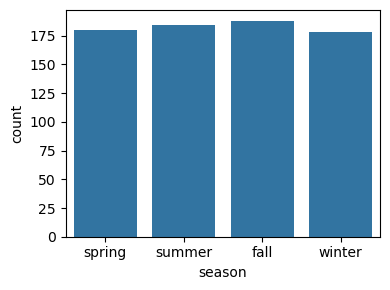

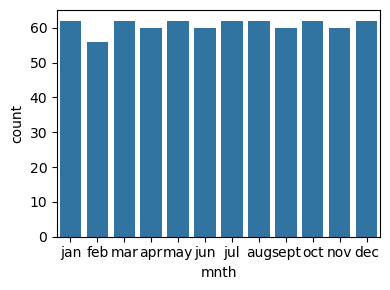

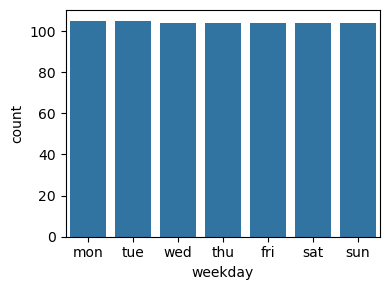

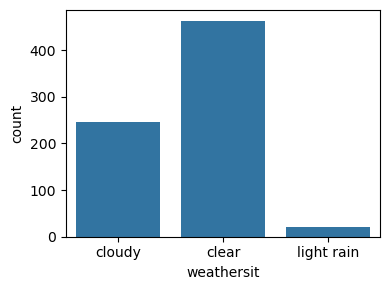

In [24]:
for i in categorical_data:
    plt.figure(figsize=(4,3))
    sns.countplot (x=bike[i])
    plt.tight_layout()
    plt.show()

NOTE-
1. there is not even a single day on which snow or heavy rain occur
 

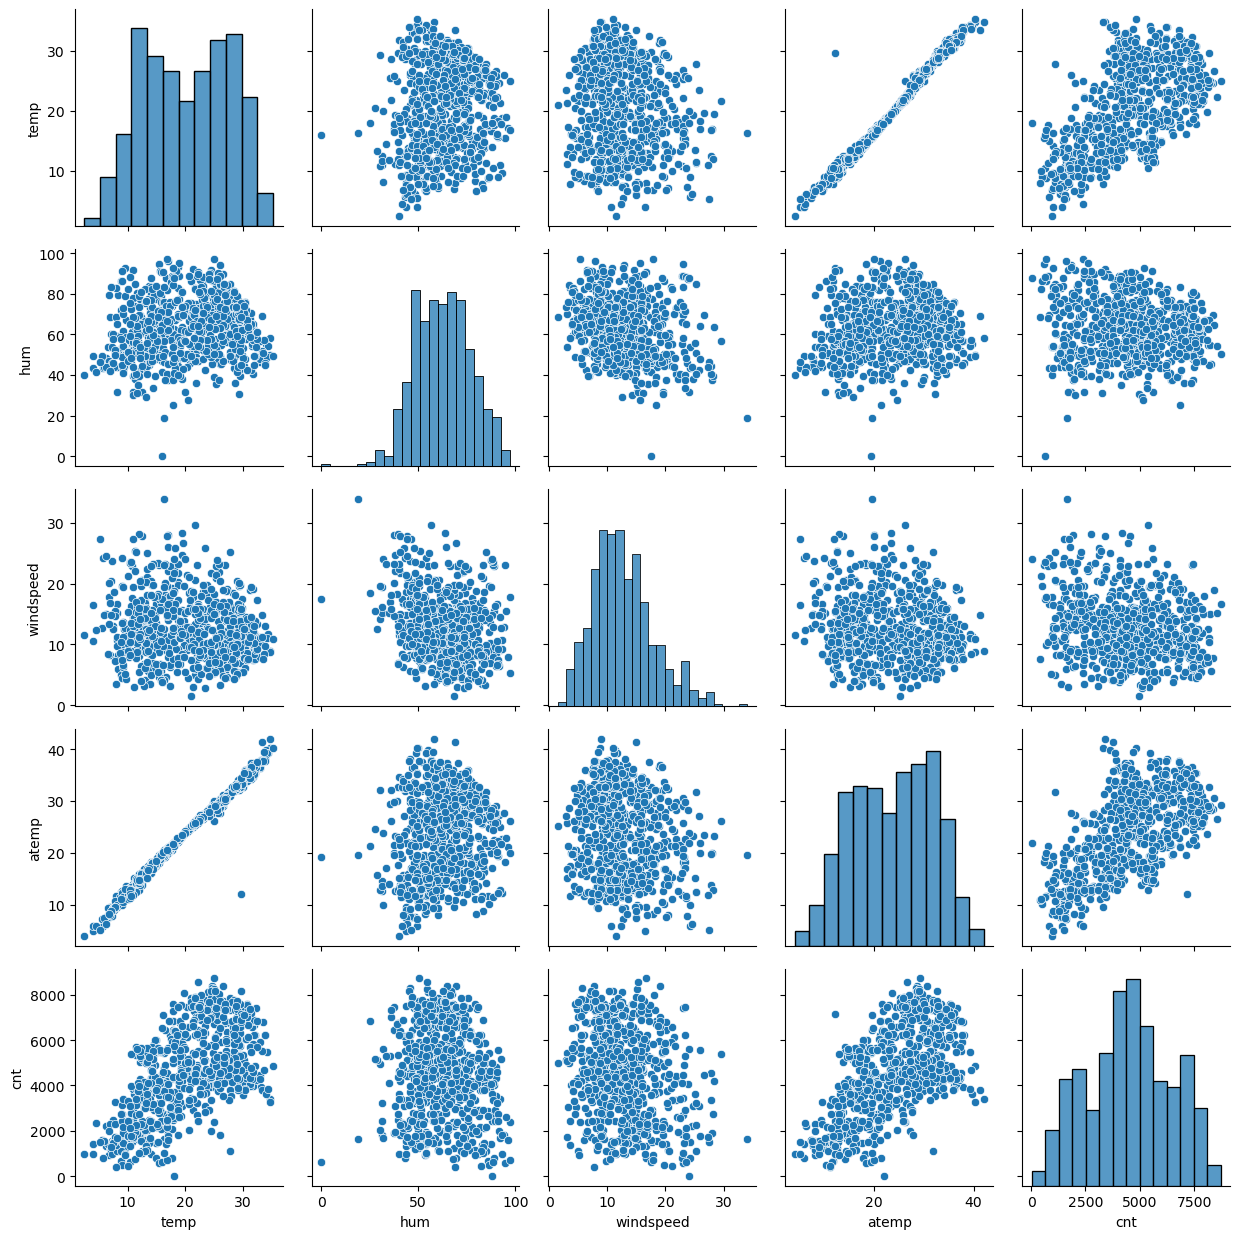

In [26]:
# numeric value pairplot
sns.pairplot(bike,vars=["temp", "hum","windspeed",'atemp',"cnt"])
plt.tight_layout()
plt.show()

NOTE- 
Temperature and atemp are highly correlated

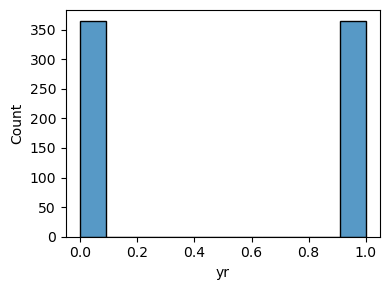

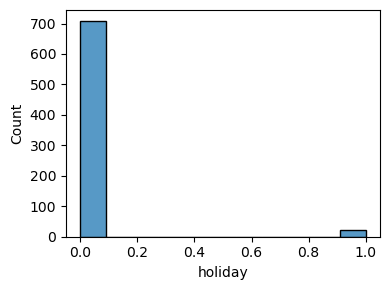

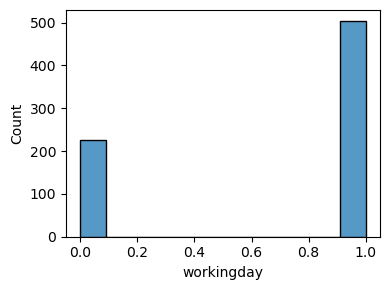

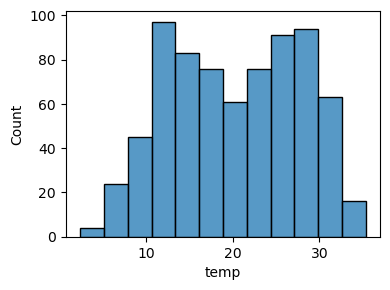

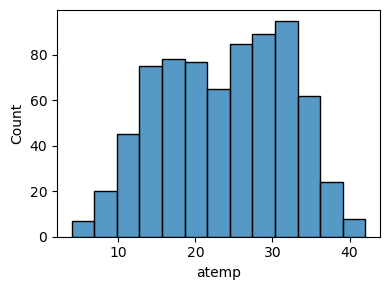

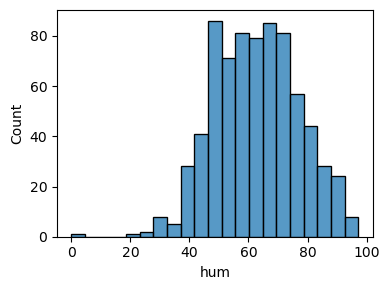

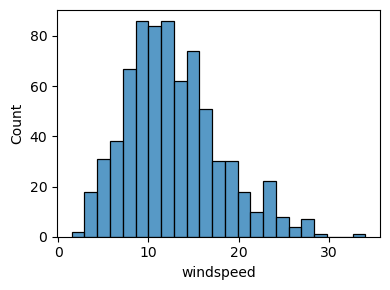

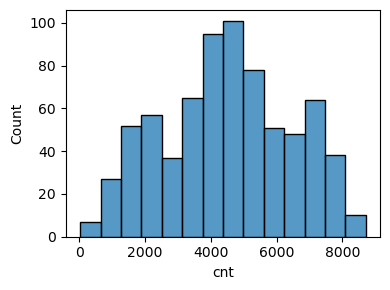

In [28]:
#plotting histplot for all numerica_data
for i in numeric_data:  
    plt.figure(figsize=(4,3))
    sns.histplot(x=bike[i]) 
    plt.tight_layout()
    plt.show()

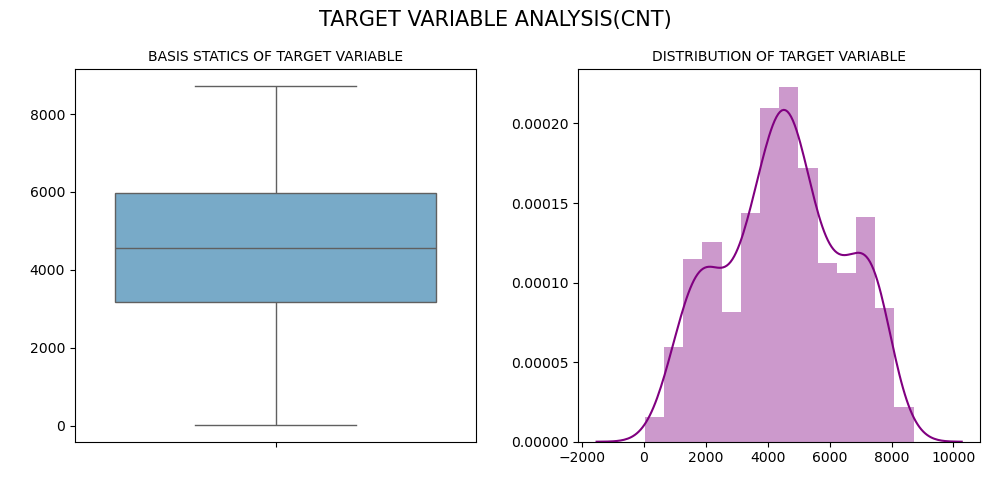

In [29]:
#Analysis of target variable
fig, tv=plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.suptitle("Target Variable Analysis(cnt)". upper(),fontsize=15)

# to check Q1,Q2,Q3 of target variable
sns.boxplot(y=bike["cnt"],ax= tv[0],palette="Blues")
tv[0].set_title("Basis Statics of Target Variable".upper(),fontsize=10,fontweight=15,y=1)
tv[0].set_ylabel(" ")
tv[0].set_xlabel(" ")

# distribution using distplot
sns.distplot(bike["cnt"],ax=tv[1],color="purple")
tv[1].set_title("Distribution of Target Variable".upper(),fontsize=10,fontweight=15,y=1)
tv[1].set_ylabel(" ")
tv[1].set_xlabel(" ")

plt.tight_layout()
plt.show()

note-
 1. target variable shows normal distribution( as it has a bell shape curve)
 2. taget variable Q1 lies around 3000 and its median is around 4500

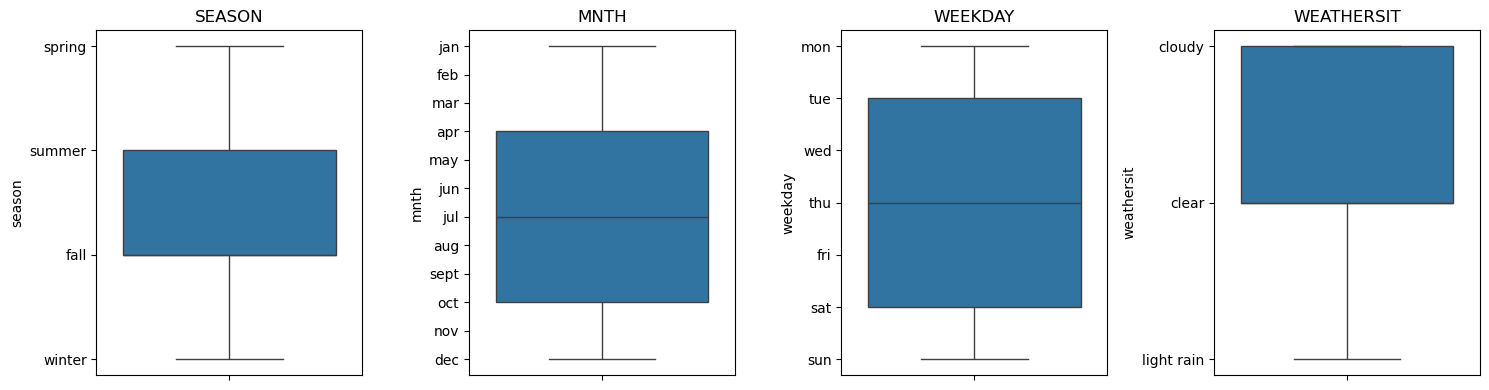

In [31]:
# checking outliers in categorical columns
figs, ax= plt.subplots(1,4,figsize=(15,4))
for i ,col in zip(ax,categorical_data):
    sns.boxplot(y=bike[col] ,ax=i)
    i.set_title(col.upper())
plt.tight_layout()
plt.show()

NOTE-
no outliers present

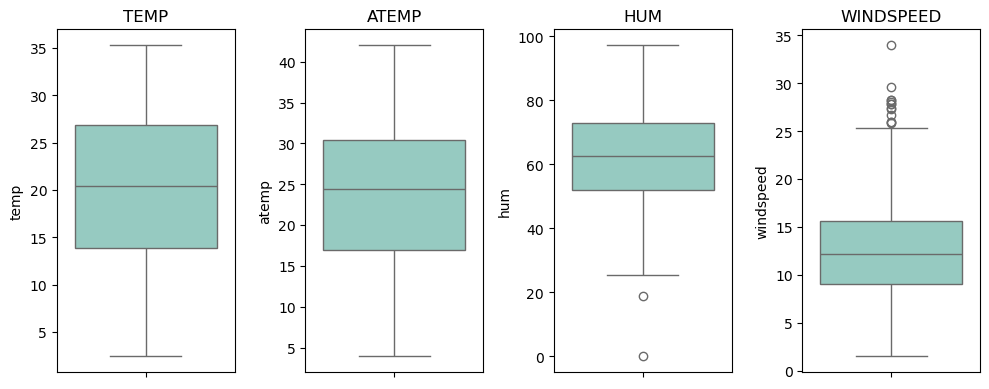

In [33]:
# checking outliers in (int) columns
cont_vari=[i for i in bike.select_dtypes(exclude="object").columns if bike[i].nunique()>2 and i !='cnt']
figs, ax= plt.subplots(1,4,figsize=(10,4))
for i ,col in zip(ax,cont_vari):
    sns.boxplot(y=bike[col] ,ax=i,palette='Set3')
    i.set_title(col.upper())
plt.tight_layout()
plt.show()

**Bivariate Analysis**

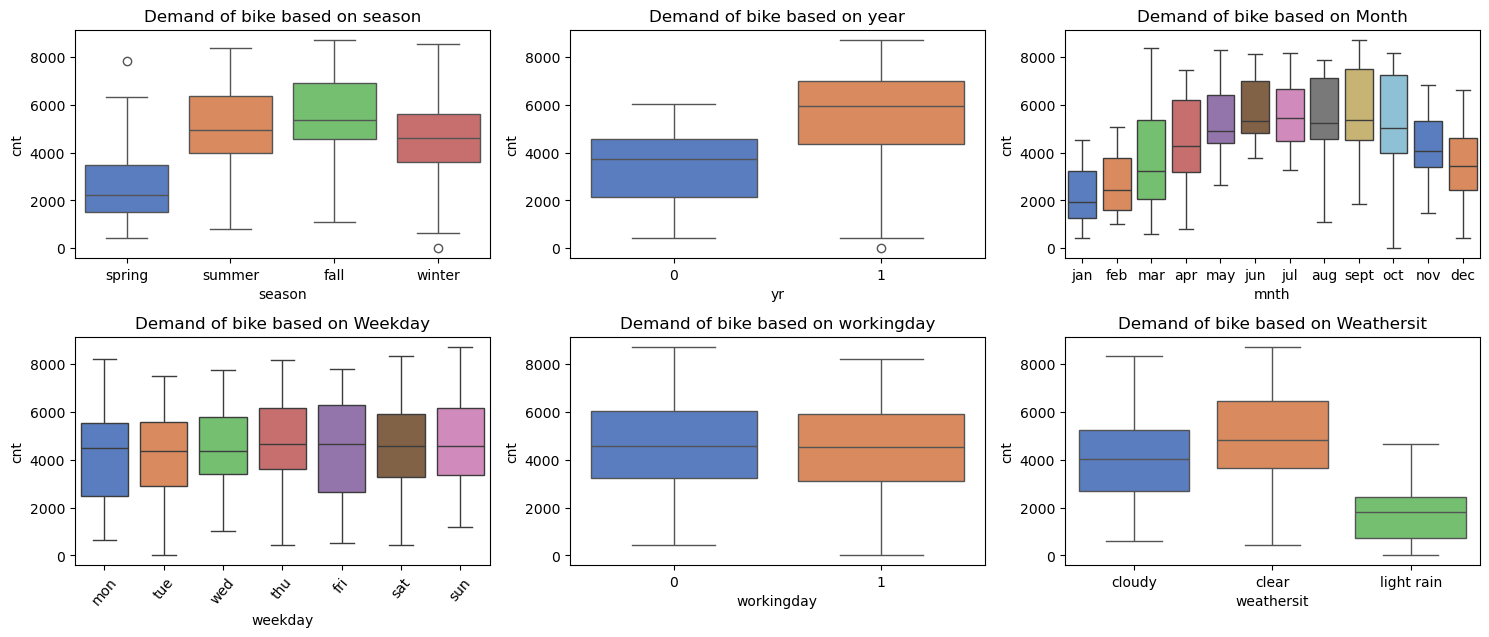

In [35]:
#Exploring Categorical Variables 
plt.figure(figsize=(15,12))
plt.subplot(4,3,1,title="Demand of bike based on season")
sns.boxplot(x="season",y="cnt", data= bike,palette="muted")

plt.subplot(4,3,2,title="Demand of bike based on year")
sns.boxplot(x='yr',y='cnt',data=bike,palette="muted")

plt.subplot(4,3,3,title="Demand of bike based on Month")
sns.boxplot(x='mnth',y='cnt',data=bike,palette="muted")

plt.subplot(4,3,6,title="Demand of bike based on Weathersit")
sns.boxplot(x='weathersit',y='cnt',data=bike,palette="muted")


plt.subplot(4,3,5,title="Demand of bike based on workingday")
sns.boxplot(x='workingday',y='cnt',data=bike,palette="muted")

plt.subplot(4,3,4,title="Demand of bike based on Weekday")
sns.boxplot(x='weekday',y='cnt',data=bike,palette="muted")

plt.xticks(rotation=50)
plt.tight_layout()
plt.show

NOTE- 
1. Demand od bike has been increased in 2019 as compared to 2018
2. There is more demand of rented bike in fall seasonas compaired to summer.
3. January, February,November, December months have comparative less demands than other months.
4. Demand of Bike Rentals are more in partly cloudy weather or clear weather.

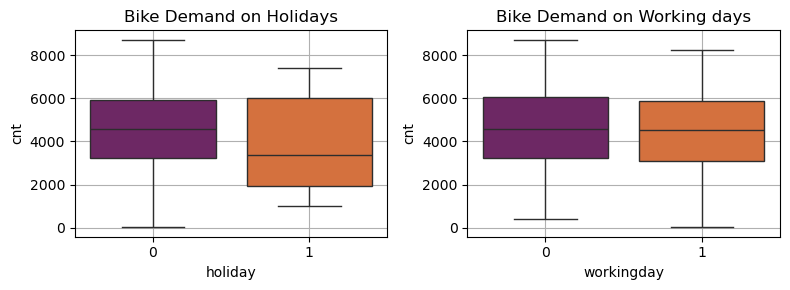

In [37]:
# Demand of bike based on holiday and working day
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1, title="Bike Demand on Holidays")
sns.boxplot(x='holiday', y='cnt', data= bike,palette="inferno")
plt.grid(True)

plt.subplot(1, 2, 2, title="Bike Demand on Working days")
sns.boxplot(x='workingday', y='cnt', data= bike,palette="inferno")
plt.grid(True)

plt.tight_layout()
plt.show()

NOTE-
1. Non-holidays have a higher number of bike rentals than holidays.
2. Holidays have a higher number of bike rentals than non-holidays.
3. Working days have slightly less demand.

**Multivariate Analysis**

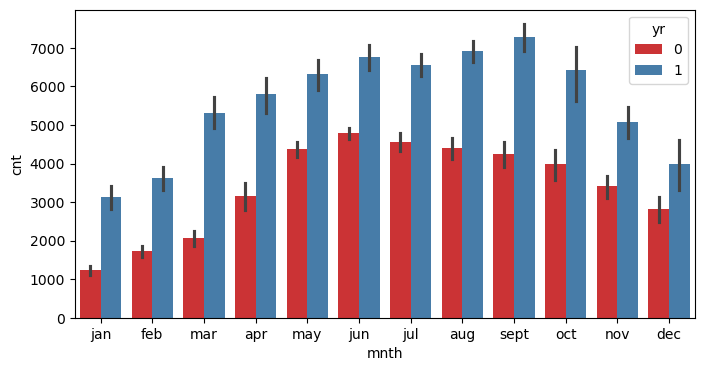

In [40]:
#Relation between month and year
plt.figure(figsize=(8,4))
sns.barplot(x='mnth',y='cnt',hue='yr',data=bike,palette='Set1')
plt.show()

Based on the data it shows same kind of curve for both the data.

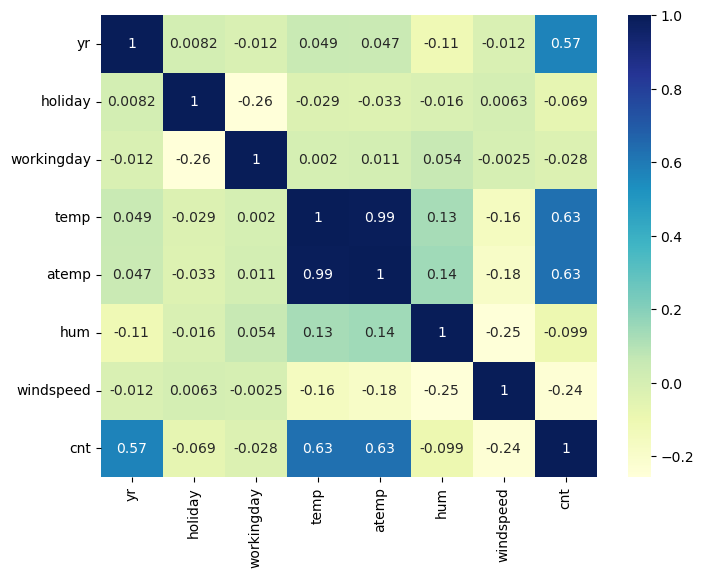

In [42]:
# correlation between all the numeric data 
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True,cmap="YlGnBu")
plt.show()

NOTE-
1. The linear relationship between temp and atemp is very strong (as seen in the pair plot), with a correlation coefficient of as high as 0.99. 
2. Plots above helps to interpret the data well and identify the variables that can turn out to be useful in building the model3. 
So yes we can consider a Linear Regression Model.

In [44]:
#Convert variables to object type
bike['mnth']=bike['mnth'].astype(object)
bike['season']=bike['season'].astype(object)
bike['weathersit']=bike['weathersit'].astype(object)
bike['weekday']=bike['weekday'].astype(object)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## DATA PREPARATION

**Dummies Variable**

In [47]:
bike = pd.get_dummies(data=bike,columns=["season","mnth","weekday","weathersit"],drop_first=True)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_light rain
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,True,False,False,False,False,False,True,False
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,False,False,True,False,True,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,True,False,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_cloudy', 'weathersit_light rain'],
      dtype='object')

In [49]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    bool   
 9   season_summer          730 non-null    bool   
 10  season_winter          730 non-null    bool   
 11  mnth_aug               730 non-null    bool   
 12  mnth_dec               730 non-null    bool   
 13  mnth_feb               730 non-null    bool   
 14  mnth_jan               730 non-null    bool   
 15  mnth_j

In [50]:
bike.shape

(730, 30)

In [51]:
bike=bike.astype(int)

In [52]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_light rain
0,0,0,1,14,18,80,10,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14,17,69,16,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8,9,43,16,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8,10,59,10,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9,11,43,12,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## Training And Testing Set

The target variable is count("cnt")

In [55]:
np.random.seed(0)
#Train Test split with 70:30 ratio
X=bike.drop(['cnt'],axis=1)
y=bike['cnt']

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [57]:
# checking the shape of train-test dataset
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


## Scaling

scaling only numeric variables

In [60]:
scaler=MinMaxScaler()

In [61]:
#convenient way to train the modelis fit_transform as it  means to do some calculation and then to transform as needed in training set
num_vars=['atemp','hum','windspeed']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars]=scaler.transform(X_test[num_vars])

In [62]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_light rain
653,1,0,1,19,0.512821,0.567010,0.31250,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29,0.769231,0.721649,0.28125,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16,0.435897,0.639175,0.25000,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10,0.205128,0.494845,0.65625,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15,0.384615,0.494845,0.18750,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [63]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_light rain
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.712329,19.606654,0.512218,0.645672,0.322896,0.242661,0.246575,0.248532,...,0.086106,0.080235,0.154599,0.129159,0.136986,0.142857,0.152642,0.136986,0.344423,0.029354
std,0.500412,0.157613,0.453121,7.422533,0.207533,0.145766,0.165333,0.429112,0.431440,0.432585,...,0.280795,0.271923,0.361876,0.335704,0.344170,0.350270,0.359994,0.344170,0.475645,0.168963
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.000000,0.333333,0.536082,0.218750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.000000,0.538462,0.649485,0.312500,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.000000,0.692308,0.752577,0.406250,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_cloudy', 'weathersit_light rain'],
      dtype='object')

In [65]:
X_train_df=pd.DataFrame(X_train)
X_test_df=pd.DataFrame(X_test)

In [66]:
X_train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_light rain
653,1,0,1,19,0.512821,0.567010,0.31250,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29,0.769231,0.721649,0.28125,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16,0.435897,0.639175,0.25000,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10,0.205128,0.494845,0.65625,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15,0.384615,0.494845,0.18750,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [67]:
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int32

## Modelling

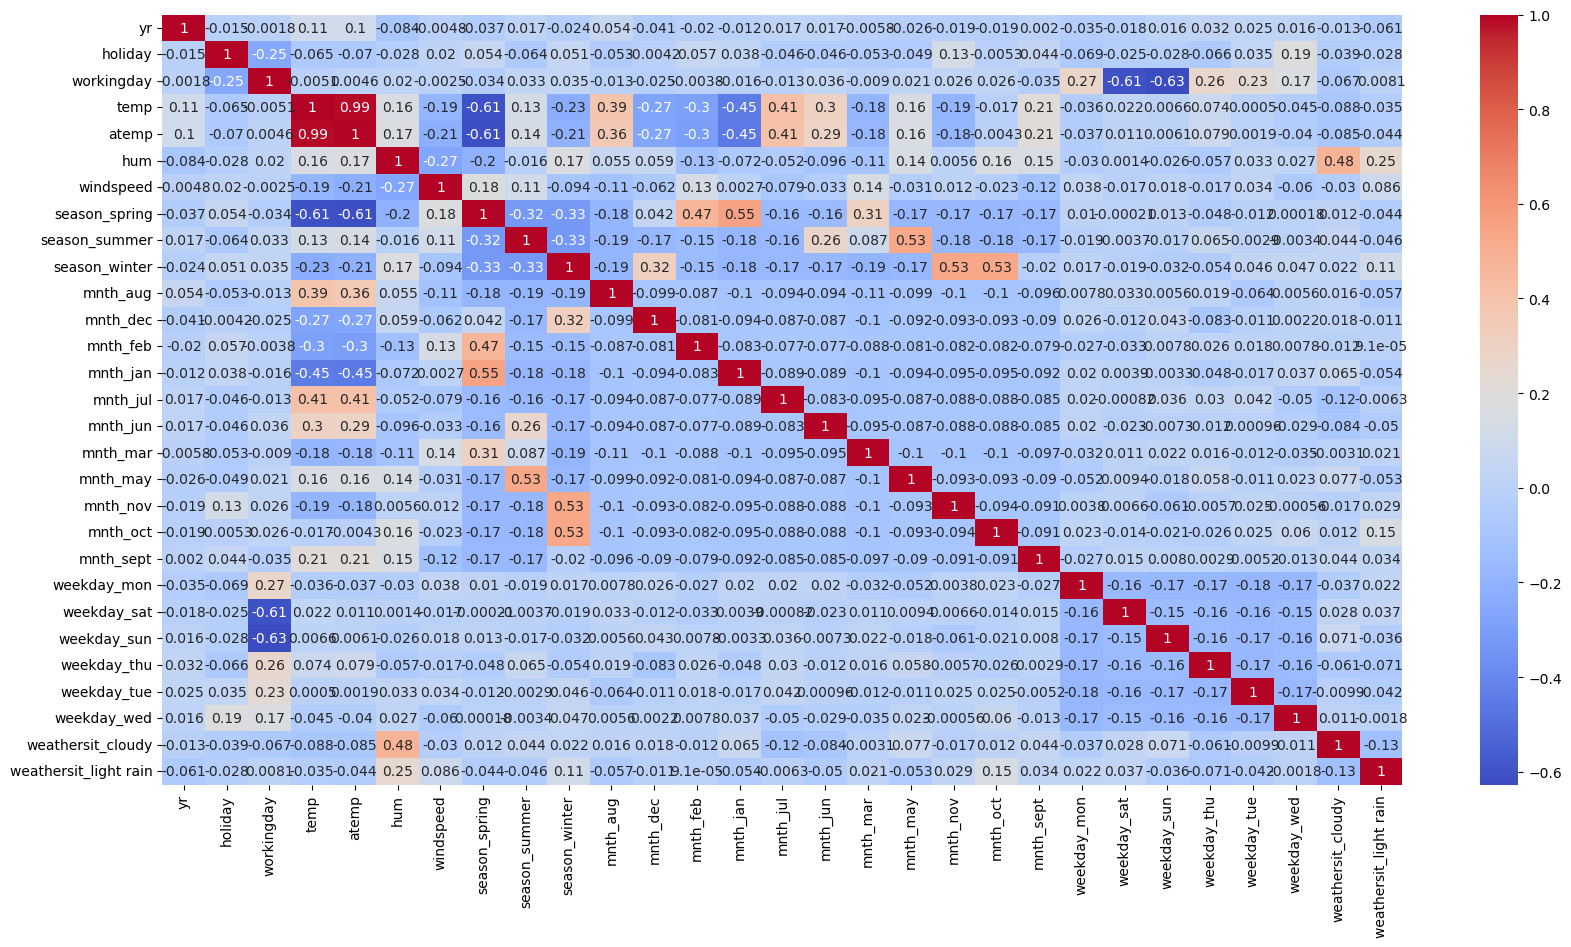

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True, cmap="coolwarm")
plt.show()

In [70]:
# best 15 are selected
lr=LinearRegression()
lr.fit(X_train_df,y_train)
selector_features = RFE(estimator=lr, n_features_to_select=15,step=1)
selector_features=selector_features.fit(X_train_df,y_train)

In [71]:
selector_features.support_

array([ True,  True, False, False,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True,  True])

In [72]:
# ranking rfe
rfe_ranking = pd.DataFrame({'Rank' : selector_features.ranking_, 'support': selector_features.support_, 'features' : X_train_df.columns}).sort_values(by='Rank',ascending=True)
rfe_ranking

,Rank,support,features
0,1,True,yr
20,1,True,mnth_sept
18,1,True,mnth_nov
27,1,True,weathersit_cloudy
13,1,True,mnth_jan
12,1,True,mnth_feb
11,1,True,mnth_dec
9,1,True,season_winter
14,1,True,mnth_jul
7,1,True,season_spring


In [73]:
# Selected Features
selected = rfe_ranking.loc[rfe_ranking['Rank'] == 1,'features'].values
selected

array(['yr', 'mnth_sept', 'mnth_nov', 'weathersit_cloudy', 'mnth_jan',
       'mnth_feb', 'mnth_dec', 'season_winter', 'mnth_jul',
       'season_spring', 'holiday', 'atemp', 'weathersit_light rain',
       'windspeed', 'hum'], dtype=object)

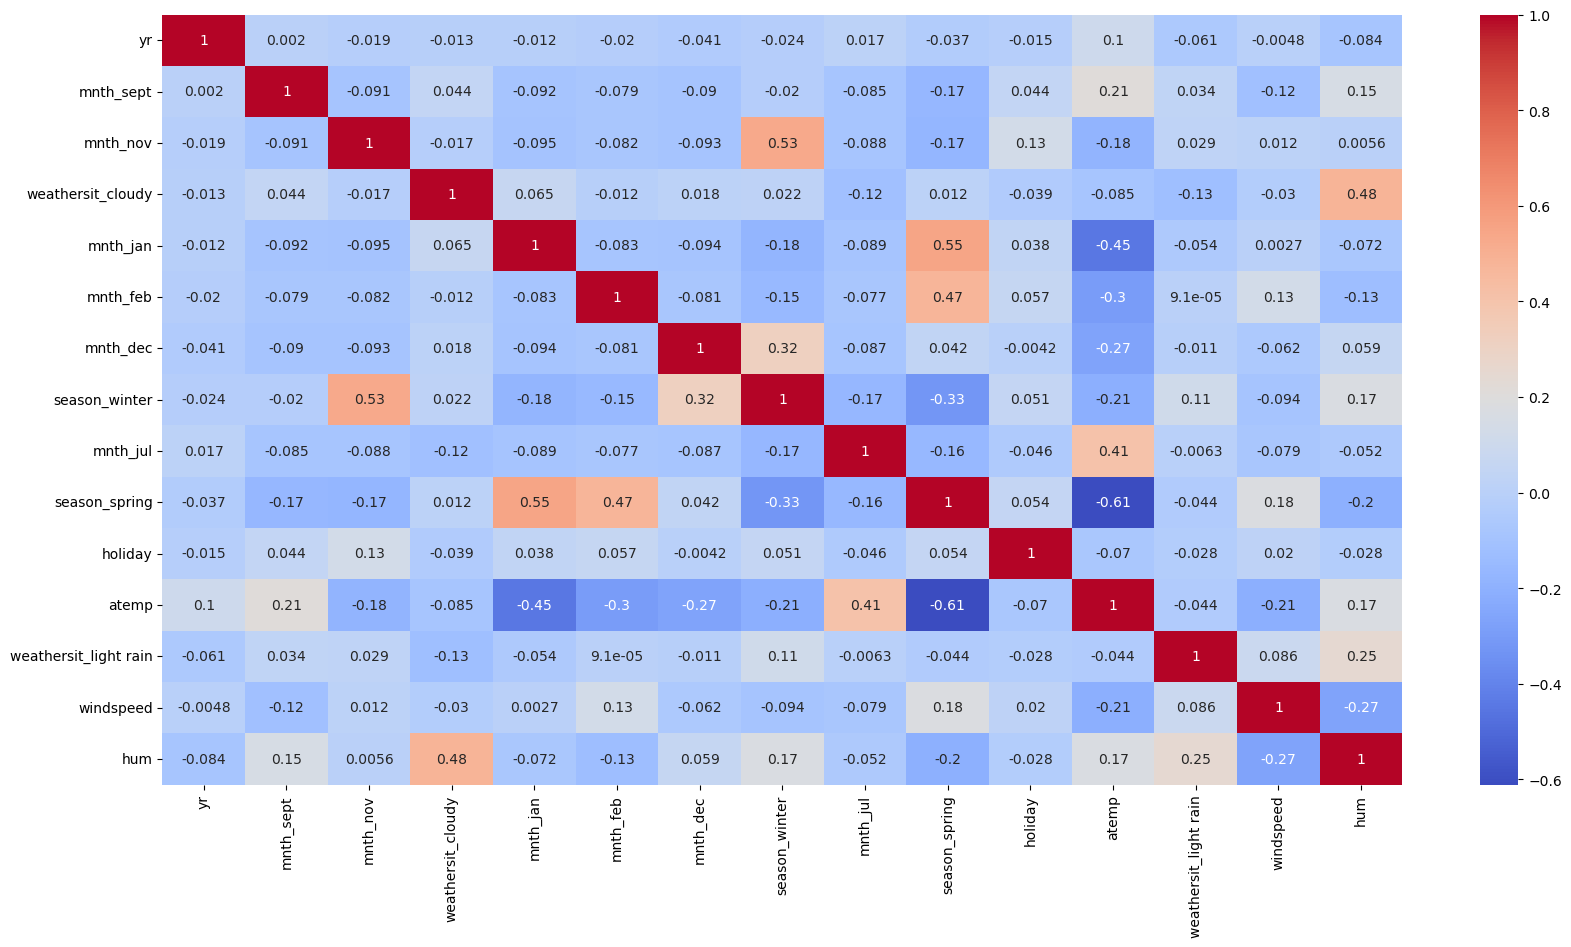

In [74]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train[selected].corr(),annot=True, cmap="coolwarm")
plt.show()

In [75]:
X_train=X_train_df[selected]
X_test=X_test_df[selected]

In [76]:
print(X_train.shape)

(511, 15)


In [77]:
print(X_test.shape)

(219, 15)


### Model-1

In [79]:
#considering all columns selected by RFE
#p-value

#build model
X_train_sm1=sm.add_constant(X_train[selected])
X_test_sm1=sm.add_constant(X_test[selected])
#create model 
model_1=sm.OLS(np.array(y_train),X_train_sm1)
#fit
model_a=model_1.fit()
#params
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.7
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          3.93e-187
Time:                        20:24:47   Log-Likelihood:                -4125.4
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     495   BIC:                             8350.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3313.6178    283.942     11.670      0.000    2755.737    3871.498
yr                     2024.4637     70.899     28.554      0.000    1885.164    2163.763
mnth_sept               505.8204    135.766      3.726      0.000     239.073     772.568
mnth_nov               -481.6332    163.717     -2.942      0.003    -803.300    -159.967
weathersit_cloudy      -490.7013     91.815     -5.344      0.000    -671.096    -310.307
mnth_jan               -643.3382    186.487     -3.450      0.001   -1009.743    -276.934
mnth_feb               -385.5103    189.376     -2.036      0.042    -757.590     -13.431
mnth_dec               -489.9290    157.892     -3.103      0.002    -800.150    -179.708
season_winter           573.2841    122.274      4.689      0.000     333.045     813.523
mnth_jul               -564.2531    150.496     -3.749      0.000    -859.942    -268.564
season_spring          -803.6188    150.141     -5.352      0.000   -1098.611    -508.627
holiday                -726.7600    225.408     -3.224      0.001   -1169.634    -283.886
atemp                  3827.9825    318.178     12.031      0.000    3202.836    4453.129
weathersit_light rain -2168.6790    232.270     -9.337      0.000   -2625.035   -1712.323
windspeed             -1506.9401    232.777     -6.474      0.000   -1964.293   -1049.587
hum                   -1324.7975    331.396     -3.998      0.000   -1975.914    -673.681
==============================================================================
Omnibus:                       73.327   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.119
Skew:                          -0.718   Prob(JB):                     1.91e-42
Kurtosis:                       5.639   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
#VIF
df=X_train[selected]
vif=pd.DataFrame()
vif['Features']=df.columns
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
14,hum,25.83
11,atemp,17.70
13,windspeed,4.16
9,season_spring,4.06
7,season_winter,2.93
4,mnth_jan,2.37
3,weathersit_cloudy,2.28
0,yr,2.07
5,mnth_feb,1.91
2,mnth_nov,1.84


--Dropping hum as it has high VIF.

### Model-2

In [83]:
#removing hum
selected_features_2=['yr', 'holiday', 'atemp', 'windspeed', 'season_spring','season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul','mnth_nov', 'mnth_sept', 'weathersit_cloudy', 'weathersit_light rain']
#build model
X_train_sm2=sm.add_constant(X_train[selected_features_2])
X_test_sm2=sm.add_constant(X_test[selected_features_2])
#create model 
model_2=sm.OLS(np.array(y_train),X_train_sm2)
#fit
model_b=model_2.fit()
#params
model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          7.15e-185
Time:                        20:24:47   Log-Likelihood:                -4133.5
No. Observations:                 511   AIC:                             8297.
Df Residuals:                     496   BIC:                             8360.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2645.1529    232.922     11.356      0.000    2187.517    3102.789
yr                     2056.2881     71.506     28.757      0.000    1915.795    2196.781
holiday                -736.3585    228.773     -3.219      0.001   -1185.843    -286.874
atemp                  3507.2317    312.511     11.223      0.000    2893.223    4121.240
windspeed             -1273.8293    228.733     -5.569      0.000   -1723.234    -824.425
season_spring          -820.4158    152.332     -5.386      0.000   -1119.711    -521.121
season_winter           498.5144    122.646      4.065      0.000     257.545     739.484
mnth_dec               -544.9797    159.648     -3.414      0.001    -858.649    -231.311
mnth_feb               -400.5649    192.176     -2.084      0.038    -778.145     -22.985
mnth_jan               -698.1559    188.770     -3.698      0.000   -1069.044    -327.268
mnth_jul               -497.1671    151.799     -3.275      0.001    -795.415    -198.919
mnth_nov               -479.8692    166.171     -2.888      0.004    -806.355    -153.384
mnth_sept               476.1441    137.594      3.460      0.001     205.804     746.484
weathersit_cloudy      -701.7747     76.240     -9.205      0.000    -851.568    -551.982
weathersit_light rain -2540.5448    216.019    -11.761      0.000   -2964.970   -2116.119
==============================================================================
Omnibus:                       76.669   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.026
Skew:                          -0.749   Prob(JB):                     2.23e-44
Kurtosis:                       5.683   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
#VIF
df=X_train[selected_features_2]
vif=pd.DataFrame()
vif['Features']=df.columns
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,atemp,4.76
3,windspeed,4.12
4,season_spring,3.75
5,season_winter,2.58
8,mnth_jan,2.20
0,yr,2.07
7,mnth_feb,1.88
10,mnth_nov,1.82
6,mnth_dec,1.55
12,weathersit_cloudy,1.54


### Model-3

In [86]:
#removing windspeed 
selected_features_3=['yr', 'holiday', 'atemp', 'season_spring','season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul','mnth_nov', 'mnth_sept', 'weathersit_cloudy', 'weathersit_light rain']
#build model
X_train_sm3=sm.add_constant(X_train[selected_features_3])
X_test_sm3=sm.add_constant(X_test[selected_features_3])
#create model 
model_3=sm.OLS(np.array(y_train),X_train_sm3)
#fit
model_c=model_3.fit()
#params
model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     182.2
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          1.65e-179
Time:                        20:24:48   Log-Likelihood:                -4149.0
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     497   BIC:                             8385.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1998.0361    207.874      9.612      0.000    1589.615    2406.457
yr                     2045.1834     73.605     27.786      0.000    1900.567    2189.799
holiday                -762.1638    235.532     -3.236      0.001   -1224.925    -299.403
atemp                  3884.7719    314.146     12.366      0.000    3267.554    4501.990
season_spring          -854.6930    156.736     -5.453      0.000   -1162.640    -546.746
season_winter           577.7730    125.442      4.606      0.000     331.311     824.235
mnth_dec               -432.7113    163.082     -2.653      0.008    -753.126    -112.296
mnth_feb               -332.9139    197.499     -1.686      0.092    -720.949      55.121
mnth_jan               -508.2133    191.188     -2.658      0.008    -883.849    -132.577
mnth_jul               -500.8367    156.314     -3.204      0.001    -807.954    -193.719
mnth_nov               -469.9396    171.105     -2.746      0.006    -806.118    -133.761
mnth_sept               538.1479    141.224      3.811      0.000     260.679     815.617
weathersit_cloudy      -690.2843     78.480     -8.796      0.000    -844.477    -536.092
weathersit_light rain -2637.2118    221.727    -11.894      0.000   -3072.850   -2201.574
==============================================================================
Omnibus:                       82.427   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.514
Skew:                          -0.781   Prob(JB):                     5.34e-51
Kurtosis:                       5.905   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
#VIF
df=X_train[selected_features_3]
vif=pd.DataFrame()
vif['Features']=df.columns
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,season_spring,3.40
2,atemp,3.10
4,season_winter,2.57
7,mnth_jan,2.20
0,yr,2.05
6,mnth_feb,1.87
9,mnth_nov,1.79
5,mnth_dec,1.54
11,weathersit_cloudy,1.53
8,mnth_jul,1.33


### Model-4

In [89]:
#removing mnth_feb as it have high p-value
selected_features_4=['yr', 'holiday', 'atemp', 'season_spring','season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul','mnth_nov', 'mnth_sept', 'weathersit_cloudy', 'weathersit_light rain']
#build model
X_train_sm4=sm.add_constant(X_train[selected_features_4])
X_test_sm4=sm.add_constant(X_test[selected_features_4])
#create model 
model_4=sm.OLS(np.array(y_train),X_train_sm4)
#fit
model_d=model_4.fit()
#params
model_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     196.4
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          4.71e-180
Time:                        20:24:48   Log-Likelihood:                -4150.4
No. Observations:                 511   AIC:                             8327.
Df Residuals:                     498   BIC:                             8382.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1927.6682    204.016      9.449      0.000    1526.831    2328.506
yr                     2043.1589     73.732     27.711      0.000    1898.296    2188.022
holiday                -783.3902    235.629     -3.325      0.001   -1246.340    -320.440
atemp                  3998.9320    307.326     13.012      0.000    3395.117    4602.747
season_spring          -976.6261    139.302     -7.011      0.000   -1250.319    -702.933
season_winter           568.2658    125.546      4.526      0.000     321.600     814.932
mnth_dec               -355.2840    156.769     -2.266      0.024    -663.293     -47.275
mnth_jan               -337.9170    162.615     -2.078      0.038    -657.414     -18.420
mnth_jul               -521.5586    156.118     -3.341      0.001    -828.289    -214.828
mnth_nov               -431.7414    169.911     -2.541      0.011    -765.572     -97.910
mnth_sept               537.3148    141.484      3.798      0.000     259.336     815.293
weathersit_cloudy      -690.7233     78.624     -8.785      0.000    -845.199    -536.247
weathersit_light rain -2628.2916    222.073    -11.835      0.000   -3064.608   -2191.975
==============================================================================
Omnibus:                       77.999   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.125
Skew:                          -0.738   Prob(JB):                     1.59e-48
Kurtosis:                       5.857   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
#VIF
df=X_train[selected_features_4]
vif=pd.DataFrame()
vif['Features']=df.columns
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,atemp,3.08
4,season_winter,2.53
0,yr,2.05
3,season_spring,1.93
8,mnth_nov,1.78
6,mnth_jan,1.65
10,weathersit_cloudy,1.53
5,mnth_dec,1.46
7,mnth_jul,1.33
9,mnth_sept,1.20


### Model-5

In [92]:
#removing mnth_jan
selected_features_5=['yr', 'holiday', 'atemp', 'season_spring','season_winter', 'mnth_dec', 'mnth_jul','mnth_nov', 'mnth_sept', 'weathersit_cloudy', 'weathersit_light rain']
#build model
X_train_sm5=sm.add_constant(X_train[selected_features_5])
X_test_sm5=sm.add_constant(X_test[selected_features_5])
#create model 
model_5=sm.OLS(np.array(y_train),X_train_sm5)
#fit
model_e=model_5.fit()
#params
model_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.5
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.68e-180
Time:                        20:24:49   Log-Likelihood:                -4152.6
No. Observations:                 511   AIC:                             8329.
Df Residuals:                     499   BIC:                             8380.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1826.0041    198.720      9.189      0.000    1435.573    2216.436
yr                     2038.6083     73.944     27.570      0.000    1893.329    2183.887
holiday                -790.5000    236.387     -3.344      0.001   -1254.936    -326.064
atemp                  4169.3476    297.165     14.030      0.000    3585.499    4753.196
season_spring         -1049.5579    135.256     -7.760      0.000   -1315.300    -783.816
season_winter           569.4857    125.962      4.521      0.000     322.005     816.966
mnth_dec               -284.5546    153.537     -1.853      0.064    -586.213      17.104
mnth_jul               -554.3778    155.832     -3.558      0.000    -860.546    -248.210
mnth_nov               -393.5254    169.474     -2.322      0.021    -726.495     -60.556
mnth_sept               530.9792    141.920      3.741      0.000     252.144     809.814
weathersit_cloudy      -698.0344     78.806     -8.858      0.000    -852.867    -543.202
weathersit_light rain -2601.1771    222.426    -11.695      0.000   -3038.183   -2164.171
==============================================================================
Omnibus:                       74.648   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.405
Skew:                          -0.706   Prob(JB):                     2.05e-46
Kurtosis:                       5.808   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
#VIF
df=X_train[selected_features_5]
vif=pd.DataFrame()
vif['Features']=df.columns
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,atemp,3.03
4,season_winter,2.50
0,yr,2.04
7,mnth_nov,1.77
9,weathersit_cloudy,1.51
5,mnth_dec,1.42
6,mnth_jul,1.33
3,season_spring,1.29
8,mnth_sept,1.20
10,weathersit_light rain,1.07


### Model-6

In [95]:
#drop dec
selected_features_6=['yr', 'holiday', 'atemp', 'season_spring','season_winter', 'mnth_jul','mnth_nov', 'mnth_sept', 'weathersit_cloudy', 'weathersit_light rain']
#build model
X_train_sm6=sm.add_constant(X_train[selected_features_6])
X_test_sm6=sm.add_constant(X_test[selected_features_6])
#create model 
model_6=sm.OLS(np.array(y_train),X_train_sm6)
#fit
model_f=model_6.fit()
#params
model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     232.3
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          9.43e-181
Time:                        20:24:49   Log-Likelihood:                -4154.4
No. Observations:                 511   AIC:                             8331.
Df Residuals:                     500   BIC:                             8377.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1750.8045    195.007      8.978      0.000    1367.671    2133.938
yr                     2040.9029     74.113     27.538      0.000    1895.291    2186.514
holiday                -794.8558    236.950     -3.355      0.001   -1260.396    -329.316
atemp                  4279.9218    291.822     14.666      0.000    3706.573    4853.270
season_spring         -1038.8713    135.462     -7.669      0.000   -1305.016    -772.727
season_winter           483.9940    117.496      4.119      0.000     253.146     714.842
mnth_jul               -570.9553    155.954     -3.661      0.000    -877.361    -264.550
mnth_nov               -279.1265    158.217     -1.764      0.078    -589.978      31.725
mnth_sept               548.0828    141.964      3.861      0.000     269.163     827.003
weathersit_cloudy      -694.2405     78.971     -8.791      0.000    -849.397    -539.084
weathersit_light rain -2568.8156    222.278    -11.557      0.000   -3005.530   -2132.101
==============================================================================
Omnibus:                       69.676   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.732
Skew:                          -0.676   Prob(JB):                     2.83e-41
Kurtosis:                       5.635   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
#VIF
df=X_train[selected_features_6]
vif=pd.DataFrame()
vif['Features']=df.columns
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,atemp,3.03
0,yr,2.04
4,season_winter,1.90
6,mnth_nov,1.57
8,weathersit_cloudy,1.51
5,mnth_jul,1.33
3,season_spring,1.25
7,mnth_sept,1.20
1,holiday,1.06
9,weathersit_light rain,1.06


### Model-7

In [98]:
#dropping mnth_nov
selected_features_7=['yr', 'holiday', 'atemp', 'season_spring','season_winter', 'mnth_jul', 'mnth_sept', 'weathersit_cloudy', 'weathersit_light rain']
#build model
X_train_sm7=sm.add_constant(X_train[selected_features_7])
X_test_sm7=sm.add_constant(X_test[selected_features_7])
#create model 
model_7=sm.OLS(np.array(y_train),X_train_sm7)
#fit
model_g=model_7.fit()
#params
model_g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.6
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.68e-181
Time:                        20:24:51   Log-Likelihood:                -4156.0
No. Observations:                 511   AIC:                             8332.
Df Residuals:                     501   BIC:                             8374.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1705.9433    193.749      8.805      0.000    1325.283    2086.604
yr                     2040.5215     74.269     27.475      0.000    1894.605    2186.438
holiday                -845.7447    235.683     -3.588      0.000   -1308.793    -382.696
atemp                  4344.3267    290.139     14.973      0.000    3774.287    4914.366
season_spring         -1012.5876    134.924     -7.505      0.000   -1277.674    -747.502
season_winter           401.7604    108.082      3.717      0.000     189.410     614.111
mnth_jul               -579.0755    156.214     -3.707      0.000    -885.991    -272.160
mnth_sept               568.2015    141.804      4.007      0.000     289.598     846.805
weathersit_cloudy      -688.6926     79.075     -8.709      0.000    -844.051    -533.334
weathersit_light rain -2552.4471    222.552    -11.469      0.000   -2989.698   -2115.196
==============================================================================
Omnibus:                       66.041   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.073
Skew:                          -0.652   Prob(JB):                     7.11e-38
Kurtosis:                       5.517   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
#VIF
df=X_train[selected_features_7]
vif=pd.DataFrame()
vif['Features']=df.columns
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,atemp,3.03
0,yr,2.04
7,weathersit_cloudy,1.51
4,season_winter,1.34
5,mnth_jul,1.33
3,season_spring,1.25
6,mnth_sept,1.19
8,weathersit_light rain,1.06
1,holiday,1.04


### Model-8

In [101]:
#add windspeed
selected_features_8=['yr', 'holiday', 'atemp',"windspeed" ,'season_spring','season_winter', 'mnth_jul', 'mnth_sept', 'weathersit_cloudy', 'weathersit_light rain']

#build model
X_train_sm8=sm.add_constant(X_train[selected_features_8])
X_test_sm8=sm.add_constant(X_test[selected_features_8])
#create model 
model_8=sm.OLS(np.array(y_train),X_train_sm8)
#fit
model_h=model_8.fit()
#params
model_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     243.6
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          5.15e-185
Time:                        20:24:54   Log-Likelihood:                -4144.3
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     500   BIC:                             8357.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2203.2098    215.726     10.213      0.000    1779.369    2627.050
yr                     2048.4444     72.686     28.182      0.000    1905.637    2191.252
holiday                -824.3749    230.643     -3.574      0.000   -1277.524    -371.226
atemp                  4119.2451    287.682     14.319      0.000    3554.030    4684.461
windspeed             -1100.1366    227.782     -4.830      0.000   -1547.665    -652.608
season_spring         -1034.6072    132.093     -7.832      0.000   -1294.133    -775.082
season_winter           325.9803    106.909      3.049      0.002     115.934     536.027
mnth_jul               -594.7600    152.880     -3.890      0.000    -895.126    -294.394
mnth_sept               512.7533    139.220      3.683      0.000     239.225     786.281
weathersit_cloudy      -701.5648     77.415     -9.062      0.000    -853.664    -549.465
weathersit_light rain -2452.4263    218.736    -11.212      0.000   -2882.181   -2022.672
==============================================================================
Omnibus:                       58.846   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.938
Skew:                          -0.604   Prob(JB):                     1.51e-31
Kurtosis:                       5.282   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
#VIF
df=X_train[selected_features_8]
vif=pd.DataFrame()
vif['Features']=df.columns
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,atemp,4.66
3,windspeed,4.06
0,yr,2.06
4,season_spring,1.64
8,weathersit_cloudy,1.52
5,season_winter,1.40
6,mnth_jul,1.34
7,mnth_sept,1.20
9,weathersit_light rain,1.08
1,holiday,1.04


### Model-9

In [104]:
#adding mnth_jan
selected_features_9=['yr','atemp','mnth_jan', 'holiday',"windspeed" ,'season_spring','season_winter', 'mnth_jul', 'mnth_sept', 'weathersit_cloudy', 'weathersit_light rain']

#build model
X_train_sm9=sm.add_constant(X_train[selected_features_9])
X_test_sm9=sm.add_constant(X_test[selected_features_9])
#create model 
model_9=sm.OLS(np.array(y_train),X_train_sm9)
#fit
model_i=model_9.fit()
#params
model_i.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.0
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          5.02e-185
Time:                        20:24:57   Log-Likelihood:                -4141.4
No. Observations:                 511   AIC:                             8307.
Df Residuals:                     499   BIC:                             8358.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2331.4122    221.400     10.530      0.000    1896.422    2766.403
yr                     2054.7122     72.398     28.381      0.000    1912.469    2196.955
atemp                  3946.0943    295.475     13.355      0.000    3365.567    4526.622
mnth_jan               -374.6681    157.626     -2.377      0.018    -684.361     -64.975
holiday                -818.0386    229.593     -3.563      0.000   -1269.127    -366.950
windspeed             -1184.0941    229.465     -5.160      0.000   -1634.931    -733.257
season_spring          -951.4577    136.057     -6.993      0.000   -1218.773    -684.143
season_winter           292.0886    107.366      2.720      0.007      81.143     503.035
mnth_jul               -564.4526    152.707     -3.696      0.000    -864.481    -264.424
mnth_sept               521.0416    138.621      3.759      0.000     248.689     793.394
weathersit_cloudy      -693.1798     77.139     -8.986      0.000    -844.736    -541.623
weathersit_light rain -2465.3020    217.793    -11.319      0.000   -2893.207   -2037.397
==============================================================================
Omnibus:                       59.280   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.503
Skew:                          -0.614   Prob(JB):                     3.09e-31
Kurtosis:                       5.256   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
#VIF
df=X_train[selected_features_9]
vif=pd.DataFrame()
vif['Features']=df.columns
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,atemp,4.68
4,windspeed,4.07
5,season_spring,2.24
0,yr,2.06
2,mnth_jan,1.60
9,weathersit_cloudy,1.53
6,season_winter,1.40
7,mnth_jul,1.35
8,mnth_sept,1.20
10,weathersit_light rain,1.08


## Model-10

In [107]:
#add dec
selected_features_10=['yr','atemp','mnth_jan','mnth_dec', 'holiday',"windspeed" ,'season_spring','season_winter', 'mnth_jul', 'mnth_sept', 'weathersit_cloudy', 'weathersit_light rain']
#build model
X_train_sm10=sm.add_constant(X_train[selected_features_10])
X_test_sm10=sm.add_constant(X_test[selected_features_10])
#create model 
model_10=sm.OLS(np.array(y_train),X_train_sm10)
#fit
model_j=model_10.fit()
#params
model_j.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.1
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          8.90e-185
Time:                        20:24:59   Log-Likelihood:                -4139.2
No. Observations:                 511   AIC:                             8304.
Df Residuals:                     498   BIC:                             8360.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2434.1282    226.087     10.766      0.000    1989.927    2878.330
yr                     2053.6149     72.158     28.460      0.000    1911.843    2195.387
atemp                  3816.8207    300.937     12.683      0.000    3225.559    4408.082
mnth_jan               -444.4633    160.622     -2.767      0.006    -760.045    -128.882
mnth_dec               -298.5372    143.107     -2.086      0.037    -579.706     -17.369
holiday                -833.3435    228.944     -3.640      0.000   -1283.158    -383.529
windspeed             -1242.2748    230.393     -5.392      0.000   -1694.936    -789.613
season_spring          -936.7297    135.786     -6.899      0.000   -1203.513    -669.946
season_winter           337.1782    109.169      3.089      0.002     122.690     551.666
mnth_jul               -545.5127    152.467     -3.578      0.000    -845.071    -245.954
mnth_sept               511.1482    138.239      3.698      0.000     239.545     782.752
weathersit_cloudy      -693.7104     76.881     -9.023      0.000    -844.762    -542.659
weathersit_light rain -2490.7464    217.408    -11.457      0.000   -2917.896   -2063.597
==============================================================================
Omnibus:                       63.185   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.591
Skew:                          -0.645   Prob(JB):                     4.45e-34
Kurtosis:                       5.356   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
#VIF
df=X_train[selected_features_10]
vif=pd.DataFrame()
vif['Features']=df.columns
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,atemp,4.68
5,windspeed,4.07
6,season_spring,2.35
0,yr,2.06
2,mnth_jan,1.64
7,season_winter,1.64
10,weathersit_cloudy,1.54
8,mnth_jul,1.35
3,mnth_dec,1.29
9,mnth_sept,1.20


## Model-11

In [110]:
#add NOV
selected_features_11=['yr','atemp','mnth_jan','mnth_dec','mnth_nov' ,'holiday',"windspeed" ,'season_spring','season_winter', 'mnth_jul', 'mnth_sept', 'weathersit_cloudy', 'weathersit_light rain']
#build model
X_train_sm11=sm.add_constant(X_train[selected_features_11])
X_test_sm11=sm.add_constant(X_test[selected_features_11])
#create model 
model_11=sm.OLS(np.array(y_train),X_train_sm11)
#fit
model_k=model_11.fit()
#params
model_k.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     194.0
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          4.33e-185
Time:                        20:25:06   Log-Likelihood:                -4135.7
No. Observations:                 511   AIC:                             8299.
Df Residuals:                     497   BIC:                             8359.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2545.5144    228.730     11.129      0.000    2096.118    2994.911
yr                     2053.5992     71.735     28.628      0.000    1912.658    2194.540
atemp                  3652.9733    305.612     11.953      0.000    3052.523    4253.423
mnth_jan               -489.5789    160.602     -3.048      0.002    -805.122    -174.035
mnth_dec               -449.5347    153.454     -2.929      0.004    -751.032    -148.037
mnth_nov               -433.8574    165.251     -2.625      0.009    -758.535    -109.180
holiday                -762.4068    229.199     -3.326      0.001   -1212.726    -312.088
windspeed             -1243.6928    229.042     -5.430      0.000   -1693.703    -793.683
season_spring          -967.3516    135.492     -7.140      0.000   -1233.560    -701.143
season_winter           488.9961    122.973      3.976      0.000     247.386     730.606
mnth_jul               -522.0870    151.836     -3.438      0.001    -820.406    -223.768
mnth_sept               476.6126    138.056      3.452      0.001     205.366     747.859
weathersit_cloudy      -702.0290     76.496     -9.177      0.000    -852.324    -551.734
weathersit_light rain -2532.1418    216.707    -11.685      0.000   -2957.917   -2106.367
==============================================================================
Omnibus:                       71.324   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.631
Skew:                          -0.699   Prob(JB):                     2.98e-41
Kurtosis:                       5.610   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
#VIF
df=X_train[selected_features_11]
vif=pd.DataFrame()
vif['Features']=df.columns
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,atemp,4.72
6,windspeed,4.12
8,season_winter,2.55
7,season_spring,2.36
0,yr,2.06
4,mnth_nov,1.80
2,mnth_jan,1.65
11,weathersit_cloudy,1.54
3,mnth_dec,1.46
9,mnth_jul,1.35


## Model-12

In [113]:
#add feb
selected_features_12=['yr','atemp','mnth_feb','mnth_jan','mnth_dec','mnth_nov' ,'holiday',"windspeed" ,'season_spring','season_winter', 'mnth_jul', 'mnth_sept', 'weathersit_cloudy', 'weathersit_light rain']
#build model
X_train_sm12=sm.add_constant(X_train[selected_features_12])
X_test_sm12=sm.add_constant(X_test[selected_features_12])
#create model 
model_12=sm.OLS(np.array(y_train),X_train_sm12)
#fit
model_l=model_12.fit()
#params
model_l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          7.15e-185
Time:                        20:25:06   Log-Likelihood:                -4133.5
No. Observations:                 511   AIC:                             8297.
Df Residuals:                     496   BIC:                             8360.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2645.1529    232.922     11.356      0.000    2187.517    3102.789
yr                     2056.2881     71.506     28.757      0.000    1915.795    2196.781
atemp                  3507.2317    312.511     11.223      0.000    2893.223    4121.240
mnth_feb               -400.5649    192.176     -2.084      0.038    -778.145     -22.985
mnth_jan               -698.1559    188.770     -3.698      0.000   -1069.044    -327.268
mnth_dec               -544.9797    159.648     -3.414      0.001    -858.649    -231.311
mnth_nov               -479.8692    166.171     -2.888      0.004    -806.355    -153.384
holiday                -736.3585    228.773     -3.219      0.001   -1185.843    -286.874
windspeed             -1273.8293    228.733     -5.569      0.000   -1723.234    -824.425
season_spring          -820.4158    152.332     -5.386      0.000   -1119.711    -521.121
season_winter           498.5144    122.646      4.065      0.000     257.545     739.484
mnth_jul               -497.1671    151.799     -3.275      0.001    -795.415    -198.919
mnth_sept               476.1441    137.594      3.460      0.001     205.804     746.484
weathersit_cloudy      -701.7747     76.240     -9.205      0.000    -851.568    -551.982
weathersit_light rain -2540.5448    216.019    -11.761      0.000   -2964.970   -2116.119
==============================================================================
Omnibus:                       76.669   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.026
Skew:                          -0.749   Prob(JB):                     2.23e-44
Kurtosis:                       5.683   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
#VIF
df=X_train[selected_features_12]
vif=pd.DataFrame()
vif['Features']=df.columns
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,atemp,4.76
7,windspeed,4.12
8,season_spring,3.75
9,season_winter,2.58
3,mnth_jan,2.20
0,yr,2.07
2,mnth_feb,1.88
5,mnth_nov,1.82
4,mnth_dec,1.55
12,weathersit_cloudy,1.54


## final model_12

**Comment** -
1. With RFE best 15 features we got R-squared =0.84
2. All the features have VIF < 5 now, which ensures there is no collinearity.
3. 
All the features have p-value < 0.05 (assumed significance level), hence all the features are important
4. Our final model contain features 'yr','atemp','mnth_feb','mnth_jan','mnth_dec','mnth_nov' ,'holiday',"windspeed" ,'season_spring','season_winter', 'mnth_jul', 'mnth_sept', 'weathersit_cloudy', 'weathersit_light rain'.
5. The model explains 84% variability in the training data.

## Residual Analysis

In [118]:
# use final model to make predictions.
y_train_fm=model_l.predict(X_train_sm12)
y_test_fm=model_l.predict(X_test_sm12)

In [119]:
# r2 
r2_train=r2_score(y_train,y_train_fm)
r2_test=r2_score(y_test,y_test_fm)
print("Train:",round(r2_train,2))
print("Test:",round(r2_test,2))

Train: 0.84
Test: 0.82


Text(0.5, 0, 'Errors')

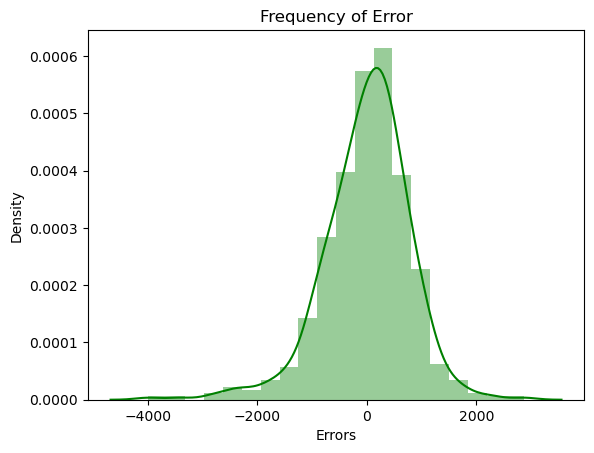

In [120]:
res=y_train-y_train_fm
sns.distplot(res,bins=20,color="green")
plt.title('Frequency of Error')
plt.xlabel('Errors')

**Comment**-
1. Error terms follow normal distribution.
2. As there is a normal distribution that is around 0 which indicates linear Regression is true.

## Prediction

Text(0, 0.5, 'y_pred')

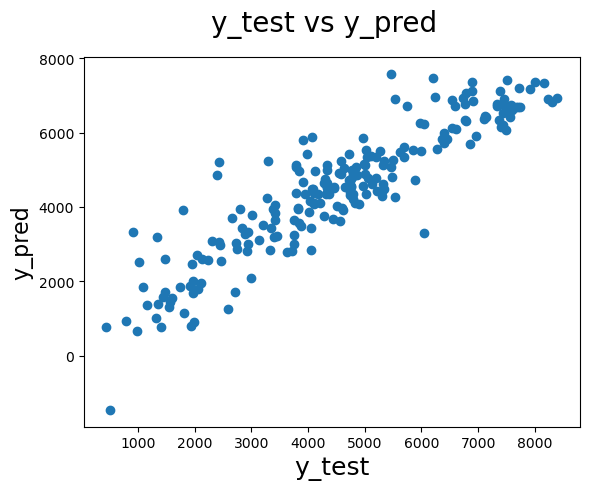

In [123]:
#CHECKING PREDICTED V/s TEST DATA 
fig = plt.figure()
plt.scatter(y_test,y_test_fm)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

## Mean Squared Error

In [126]:
#Returns the mean squared error we'll take a square root
rmse=np.sqrt(mean_squared_error(y_test, y_test_fm))
print('Root Mean Squared Error',round(rmse,3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_fm))

Root Mean Squared Error 805.234
Mean Squared Error: 648401.7484090668


## Evaluation

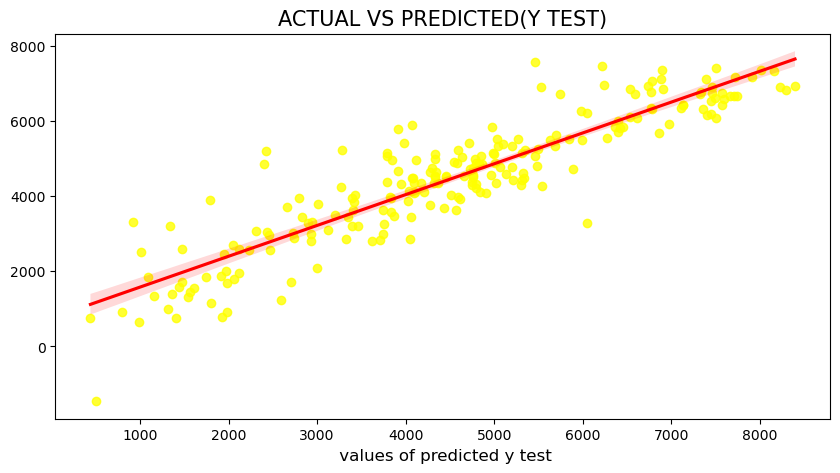

In [129]:
fig=plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=y_test_fm,scatter_kws={'color':'yellow'},line_kws={'color': 'red'})
plt.title('Actual vs Predicted(y test)'.upper(),fontsize=15)
plt.xlabel(' values of y test',fontsize=12)
plt.xlabel(' values of predicted y test',fontsize=12)
plt.show()

In [131]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
cls= cross_val_score(lin_reg,X_train[selected_features_12],y_train,cv=10, scoring='r2')
cls

array([0.77363686, 0.80412295, 0.85234664, 0.81126485, 0.8267589 ,
       0.82185946, 0.76988551, 0.84422066, 0.8597813 , 0.81843424])

In [133]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (cls.mean(), cls.std() * 2))

R-square at 0.95 confidence level : 0.82 (+/- 0.06)


## CONCLUSION

**1.The final relationship between demand and predictors is as follows:-**
cnt = 2645.1529 + 2056.2881 x yr + 3507.2317 x atemp - 400.5649 x mnth_feb - 698.1559 x mnth_jan - 544.9797 x mnth_dec - 479.8692 x mnth_nov - 736.3585 x holiday - 1273.8293 x windspeed - 820.4158 x season_spring + 498.5144 x season_winter - 497.1671 x mnth_jul + 476.1441 x mnth_sept - 701.7747 x weathersit_cloudy - 2540.5448 x weathersit_lightrain **

**2.The data set is randomly divided into training and test data. Final Model built on training data set explains 84% of the variability and achieves 82% on test data**


**3.'yr','atemp','mnth_feb','mnth_jan','mnth_dec','mnth_nov' ,'holiday',"windspeed" ,'season_spring','season_winter', 'mnth_jul', 'mnth_sept', 'weathersit_cloudy', 'weathersit_light rain is our final model.**

**4.Among this 3 most important features were - temp, Light Snow/Rain, year This was decided by inspecting absolute value of their coefficient. Negative sign is coefficient means the variable is negative correlated with target varible (cnt)**

5. Among the final model 3 most important features were - atemp,weathersit_lightrain , year This was decided by inspecting absolute value of their coefficient. Negative sign is coefficient means the variable is negative correlated with target varible (cnt)
**atemp-3507.23,**
**yr-2056.28,**
**weathersit_lightrain- -2540.54**